Step 1 - Climate Analysis and Exploration
To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.


Use SQLAlchemy create_engine to connect to your sqlite database.


Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.


Link Python to the database by creating an SQLAlchemy session.


Important Don't forget to close out your session at the end of your notebook.



Precipitation Analysis


Start by finding the most recent date in the data set.


Using this date, retrieve the last 12 months of precipitation data by querying the 12 preceding months of data. Note you do not pass in the date as a variable to your query.


Select only the date and prcp values.


Load the query results into a Pandas DataFrame and set the index to the date column.


Sort the DataFrame values by date.


Plot the results using the DataFrame plot method.


#HINT

You will need to join the station and measurement tables for some of the queries.


Use Flask jsonify to convert your API data into a valid JSON response object.

In [1]:
#session.query(mes.date).order_by(mes.date.desc()).first()

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import flask

### Reflect Tables into SQLAlchemy ORM


In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
# create engine to hawaii.sqlite


In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables
# View all of the classes that automap found


['measurement', 'station']

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
mes = Base.classes.measurement

In [9]:
sta= Base.classes.station

In [10]:
session = Session(engine)

In [11]:
#engine.execute('SELECT prcp FROM mes LIMIT 5').fetchall()

In [12]:
#engine.execute (sql way) or session.query (py way)

Start by finding the most recent date in the data set.


Using this date, retrieve the last 12 months of precipitation data by querying the 12 preceding months of data. Note you do not pass in the date as a variable to your query.


Select only the date and prcp values.


Load the query results into a Pandas DataFrame and set the index to the date column.


Sort the DataFrame values by date.


Plot the results using the DataFrame plot method.

Exploratory Precipitation Analysis


In [13]:
session.query(func.count(mes.date)).all()

[(19550)]

In [14]:
session.query(mes.date).order_by(mes.date.desc()).first()

('2017-08-23')

(0.08, '2016-08-24'),  (2.15, '2016-08-24'),  (2.28, '2016-08-24'), 

In [15]:
data= session.query(mes.prcp, mes.date).filter(mes.date > '2016-08-23').all()


same_data = session.query(EA, NA).filter(EA.sporder == NA.sporder).limit(10).all()


for record in same_sporder:
    (ea, na) = record
    print(ea.sporder)
    print(na.sporder)

same_data= session.query()

In [16]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [17]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [18]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
rain_year_df = pd.DataFrame(data, columns = ['Prcp', 'Date']) 
rain_year_df

,Prcp,Date
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28
...,...,...
2218,0.09,2017-08-19
2219,NaN,2017-08-20
2220,0.56,2017-08-21
2221,0.50,2017-08-22


In [20]:
rain_year_df.dropna()

,Prcp,Date
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28
...,...,...
2216,0.13,2017-08-17
2218,0.09,2017-08-19
2220,0.56,2017-08-21
2221,0.50,2017-08-22


In [21]:
indexed_rain= rain_year_df.rename_axis('Index')
indexed_rain

,Prcp,Date
Index,,
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28
...,...,...
2218,0.09,2017-08-19
2219,NaN,2017-08-20
2220,0.56,2017-08-21


In [22]:
rain_year_df.set_index('Date')

,Prcp
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [23]:
pv=rain_year_df
pv

,Prcp,Date
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28
...,...,...
2218,0.09,2017-08-19
2219,NaN,2017-08-20
2220,0.56,2017-08-21
2221,0.50,2017-08-22


In [24]:
pv.head()

,Prcp,Date
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28


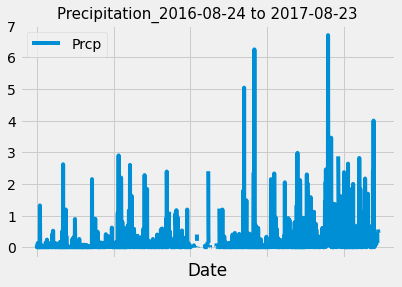

In [25]:
fig=pv.plot.line()
plt.xlabel('Date')
plt.title(f'Precipitation_2016-08-24 to 2017-08-23', size=15)
plt.tick_params(
    axis='x',          # x-axis parameter affected
    which='both',      # both ticks major and minor affected
    bottom=False,      # ticks along the bottom edge set to off
    top=False,         # ticks along the top edge set to off
    labelbottom=False)
plt.savefig("Precipitation_Hawaii_2016_2017.png")

In [26]:
print()


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# You have to rerun the cells above to continue with the data set or import the CSV file to work from

### Station Analysis

Design a query to calculate the total number of stations in the dataset.

Design a query to find the most active stations (i.e. which stations have the most rows?).

List the stations and observation counts in descending order.

Which station id has the highest number of observations?

Using the most active station id, calculate the lowest, highest, and average temperature.

Hint: You will need to use a function such as func.min, 
    func.max, func.avg, and func.count in your queries.

Design a query to retrieve the last 12 months of temperature observation data (TOBS).

Filter by the station with the highest number of observations.

Query the last 12 months of temperature observation data for this station.

Plot the results as a histogram with bins=12.

### You will need to join the station and measurement tables for some of the queries.


### Use Flask jsonify to convert your API data into a valid JSON response object.

Base.classes.keys()

mes= Base.classes.measurement
sta= Base.classes.station
session= Session(engine)

In [27]:
#engine.execute (sql way) or session.query (py way)
session = Session(engine)

In [28]:
engine.execute('SELECT sta.name FROM Station as sta').fetchall()

[('WAIKIKI 717.2, HI US',),
 ('KANEOHE 838.1, HI US',),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',),
 ('PEARL CITY, HI US',),
 ('UPPER WAHIAWA 874.3, HI US',),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',),
 ('WAIHEE 837.5, HI US',),
 ('HONOLULU OBSERVATORY 702.2, HI US',),
 ('MANOA LYON ARBO 785.2, HI US',)]

In [29]:
#Design a query to calculate the total number of stations in the dataset.

session.query(func.count(sta.id)).all()

[(9)]

In [30]:
session.query(sta.id).order_by(sta.id.desc()).first()


(9)

In [31]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [32]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [33]:
engine.execute('SELECT sta.station, sta.name, count(*) as Station_count FROM Station as sta').fetchall()


[('USC00519397', 'WAIKIKI 717.2, HI US', 9)]

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [35]:
engine.execute('SELECT sta.station, sta.name, count(*) as Station_count FROM Station as sta JOIN measurement as mes on sta.station=mes.station group by sta.name order by Station_count desc;').fetchall()

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [36]:
activestationslist= engine.execute('SELECT sta.station, sta.name, count(*) as Station_count FROM Station as sta JOIN measurement as mes on sta.station=mes.station group by sta.name order by Station_count desc;').fetchall()
type(activestationslist)

list

Using the most active station id, calculate the lowest, highest, and average temperature.

Hint: You will need to use a function such as func.min, 
    func.max, func.avg, and func.count in your queries.

Design a query to retrieve the last 12 months of temperature observation data (TOBS).

Filter by the station with the highest number of observations.

Query the last 12 months of temperature observation data for this station.

Plot the results as a histogram with bins=12.

In [37]:
asl= pd.DataFrame(activestationslist)
asl


,0,1,2
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [38]:
asl.rename(columns={0: "StationID", 1: "Station_Name", 2: "Ob_Count"})

,StationID,Station_Name,Ob_Count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [39]:
#Which station id has the highest number of observations?
#session.query(func.count(sta.id==USC00519281)).max()
#session.query(func.count(sta)).max()

#engine.execute('SELECT , mes.tabs, count(*) as Temp_count FROM station.id.USC00519281 as mes JOIN station as sta on sta.station.USC00519281= sta.measurement;'.fetchall()
engine.execute('Select s.station,  s.name, count(*) as Station_count FROM Station as s JOIN measurement as m on s.station=m.station group by s.name order by Station_count desc;').fetchall()

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

Using the most active station id, calculate the lowest, highest, and average temperature.
Hint: You will need to use a function such as func.min, 
    func.max, func.avg, and func.count in your queries.
    
   

In [111]:
avg_temperature=engine.execute("Select Avg(tobs) FROM measurement WHERE station =='USC00519281'").fetchall()
max_temperature=engine.execute("Select Max(tobs) FROM measurement WHERE station =='USC00519281'").fetchall()
min_temperature=engine.execute("Select Min(tobs) FROM measurement WHERE station =='USC00519281'").fetchall() 
    

In [112]:
avg_temperature, max_temperature, min_temperature

([(71.66378066378067,)], [(85.0,)], [(54.0,)])

In [113]:
temp_data_active=session.query(mes.date, mes.tobs).\
filter(mes.date>='2016-08-18').filter(mes.station=='USC00519281').all()
temp_data_active
#data_12= session.query(mes.tobs, mes.date).filter(mes.date > '2016-08-23').all()
#data_12

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [ ]:
active_date=session.query(Measurement.date).filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()

In [ ]:
#twelve_months_temperature=engine.execute("Select Avg(tobs) FROM measurement WHERE station =='USC00519281'").fetchall() 
#session.query(func.count(mes.date)).all()
#session.query(func.avg(mes.tobs), func.max(mes.tobs), func.min(mes.tobs)).all()

In [89]:
session.query(sta.id).order_by(sta.id.desc()).first()

(9)

In [90]:
query_date_active = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print(f'One year before most recent date: {query_date_active}')

One year before most recent date: 2016-08-18


[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [94]:
#temp_data_active

In [107]:
temp_df = pd.DataFrame(temp_data_active, columns = ['Date', 'Temps']) 
temp_df

,Date,Temps
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
...,...,...
352,2017-08-14,77.0
353,2017-08-15,77.0
354,2017-08-16,76.0
355,2017-08-17,76.0


In [ ]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [110]:
temp_df

,Date,Temps
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
...,...,...
352,2017-08-14,77.0
353,2017-08-15,77.0
354,2017-08-16,76.0
355,2017-08-17,76.0


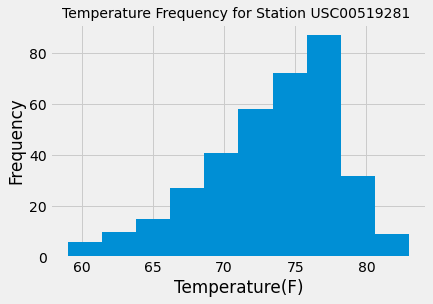

In [115]:
fig_2=temp_df.hist()
plt.xlabel('Temperature(F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Frequency for Station USC00519281 ', size=14)
plt.savefig("Temperature analysis.png")